# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## In the linear regression assignment, you were not able to take care of the multicollinearity. Use principal component analysis to come up with linearly uncorrelated variables and run linear regression with regularization with these new features. You can experiment around with different degrees of variance you want to retain in the data.</b>

In [ ]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge


from math import sqrt
import time

from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/week 12/4. Principal Component Analysis/housing.csv')

In [ ]:
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [ ]:
df=df[' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'].str.split(" +",expand=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
1,,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
2,,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
3,,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
4,,0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
501,,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
502,,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
503,,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


In [ ]:
df=df.drop([0],axis=1)

In [ ]:
for column in df:
  df[column]=pd.to_numeric(df[column],errors='coerce')

In [ ]:
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

new_row={'CRIM':0.00632,'ZN':18.00,'INDUS':2.310,'CHAS':0,'NOX':0.5380,'RM':0.5380,'AGE':65.20 ,'DIS':4.0900,'RAD':4.0900,'TAX':296.0,'PTRATIO':15.30,'B':396.90,'LSTAT': 4.98,'MEDV':24.00}

df = df.append(new_row, ignore_index=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.00,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.00,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.00,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.00,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.00,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.00,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.00,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.00,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.00,273.0,21.0,396.90,7.88,11.9


In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.00,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.00,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.00,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.00,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.00,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.00,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.00,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.00,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.00,273.0,21.0,396.90,7.88,11.9


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.667870,58.744660,6.173308,78.069348,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.225527,33.104049,6.476435,203.539887,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,0.538000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961000,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.318000,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [ ]:
mean_value=df['MEDV'].mean()
df['MEDV'].fillna(value=mean_value, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.duplicated().values.any()

False

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,0.00000,18.1,0.00,0.614,6.185,96.700,2.1705,24.0000,666.0,20.2,379.70,18.03,14.60
15,1.05393,0.0,8.14,0.000,0.538,5.935,29.3000,4.4986,4.0,307.0,21.00,386.85,6.58
332,0.05083,0.0,5.19,0.000,0.515,6.316,38.1000,6.4584,5.0,224.0,20.20,389.71,5.68
423,8.79212,0.0,18.10,0.000,0.584,5.565,70.6000,2.0635,24.0,666.0,20.20,3.65,17.16
19,1.25179,0.0,8.14,0.000,0.538,5.570,98.1000,3.7979,4.0,307.0,21.00,376.57,21.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.13117,0.0,8.56,0.000,0.520,6.127,85.2000,2.1224,5.0,384.0,20.90,387.69,14.09
270,0.16211,20.0,6.96,0.000,0.464,6.240,16.3000,4.4290,3.0,223.0,18.60,396.90,6.59
348,0.02899,40.0,1.25,0.000,0.429,6.939,34.5000,8.7921,1.0,335.0,19.70,389.85,5.89
435,0.00000,18.1,0.00,0.740,6.461,93.300,2.0026,24.0000,666.0,20.2,27.49,18.05,9.60


In [ ]:
y_train

477    23.750442
15     23.100000
332    22.200000
423    11.700000
19     13.600000
         ...    
106    20.400000
270    25.200000
348    26.600000
435    23.750442
102    19.300000
Name: MEDV, Length: 404, dtype: float64

In [ ]:
y_test

173    22.600000
274    32.000000
491    20.100000
72     23.400000
452    17.800000
         ...    
412    23.750442
436    23.750442
411    23.750442
86     22.200000
75     20.000000
Name: MEDV, Length: 102, dtype: float64

In [ ]:
pca=PCA(n_components=10)
X_train_sc = pca.fit_transform(X_train)
X_test_sc = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_

array([7.58869638e-01, 1.80066470e-01, 2.98936953e-02, 1.98096906e-02,
       8.27600430e-03, 2.56585262e-03, 2.50927723e-04, 1.45577641e-04,
       9.37564112e-05, 1.57983277e-05])

In [ ]:
X_train_sc

array([[ 8.03336982e+02,  8.25804873e+01, -7.94820688e+01, ...,
        -9.92767695e-01, -1.56864514e+00, -5.82325312e-02],
       [-6.86325714e+01, -7.23837828e+01, -3.22896696e+00, ...,
         1.52944254e+00,  4.48311559e-01, -8.84610715e-01],
       [-2.95956307e+01, -1.43277457e+02,  8.81730964e+00, ...,
         1.82689765e-01,  7.45632552e-01,  4.39955907e-01],
       ...,
       [-8.56182797e+01, -5.26309660e+01, -8.76801406e+00, ...,
        -3.24625968e+00, -1.01797563e+00,  1.98921187e+00],
       [ 7.02794455e+02,  3.88693575e+01,  1.54571467e+02, ...,
         1.23382515e+00, -3.26602839e+00,  1.33256387e-01],
       [-1.12669406e+02, -6.40674831e+00, -1.90128978e+01, ...,
        -3.64377608e+00, -4.73370617e-01,  7.55348351e-01]])

In [ ]:
models = [
           ['LinearRegression: ', LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
         ]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train_sc,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train_sc))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test_sc))
    # curr_model_data["Accuracy_Score"] = metrics.accuracy_score(y_test,curr_model.predict(X_test_sc))

    curr_model_data["Test_MSE_Score"] = mean_squared_error(y_test,curr_model.predict(X_test_sc))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test_sc)))
    model_data.append(curr_model_data)


In [ ]:
model_data

[{'Name': 'LinearRegression: ',
  'Test_MSE_Score': 30.382270432194215,
  'Test_R2_Score': 0.45710456168243063,
  'Test_RMSE_Score': 5.512011468801042,
  'Train_R2_Score': 0.5524135800756343,
  'Train_Time': 0.0015575885772705078},
 {'Name': 'Lasso: ',
  'Test_MSE_Score': 28.800429727038672,
  'Test_R2_Score': 0.4853701945912867,
  'Test_RMSE_Score': 5.366603183303073,
  'Train_R2_Score': 0.541985185853853,
  'Train_Time': 0.001425027847290039},
 {'Name': 'Ridge: ',
  'Test_MSE_Score': 30.37336723369524,
  'Test_R2_Score': 0.45726365136805225,
  'Test_RMSE_Score': 5.5112037917042445,
  'Train_R2_Score': 0.5524134524615232,
  'Train_Time': 0.000885009765625}]

In [ ]:
result= pd.DataFrame(model_data)

In [ ]:
result

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_MSE_Score,Test_RMSE_Score
0,LinearRegression:,0.001558,0.552414,0.457105,30.382270,5.512011
1,Lasso:,0.001425,0.541985,0.485370,28.800430,5.366603
2,Ridge:,0.000885,0.552413,0.457264,30.373367,5.511204


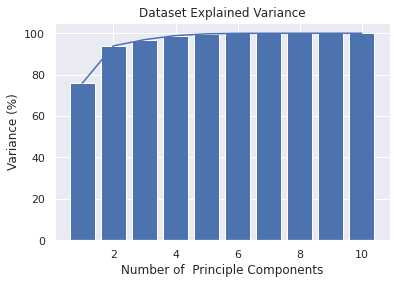

In [ ]:
plt.figure()
plt.plot(range(1,11), np.cumsum(pca.explained_variance_ratio_)*100)
plt.bar(range(1,11), np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of  Principle Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.ylim(0,105)
plt.show()